In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
credit = pd.read_excel('C:/Users/Vivek/Desktop/Python/Credit Card Case study/Data Set.xlsx')

In [4]:
print(credit.shape)
print(credit.isna().sum().sum())

(5000, 130)
22003


In [5]:
credit.drop(['birthmonth','custid','age','address','card2tenure','spoused','cartype','carown','carbought','carcatvalue','commute','commutecar','commutemotorcycle','commutecarpool',
             'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','polview',
             'polparty','polcontrib','vote','cardtenure','lnwiremon','lntollmon','lnequipten','lncardten','lncardmon',
             'lnequipmon','lnwiremon','lntollten','lnwireten'],inplace=True,axis=1)

In [6]:
print(credit.shape)
print(credit.isna().sum().sum())

(5000, 96)
14


In [7]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [8]:
credit_conti_vars = credit.loc[:, (credit.dtypes == 'float64') | (credit.dtypes == 'int64')]

In [9]:
credit.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.00,3.00,3.00,1.42,2.02,1.00,1.00,1.00,1.00,2.00,3.00,4.00,5.00,5.00,5.00,5.00
townsize,4998.0,2.0,13431.00,2.69,3.00,1.43,2.03,1.00,1.00,1.00,1.00,1.00,3.00,4.00,5.00,5.00,5.00,5.00
gender,5000.0,0.0,2518.00,0.50,1.00,0.50,0.25,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
agecat,5000.0,0.0,21194.00,4.24,4.00,1.31,1.71,2.00,2.00,2.00,2.00,3.00,4.00,5.00,6.00,6.00,6.00,6.00
ed,5000.0,0.0,72715.00,14.54,14.00,3.28,10.77,6.00,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00
edcat,5000.0,0.0,13360.00,2.67,2.00,1.21,1.47,1.00,1.00,1.00,1.00,2.00,2.00,4.00,4.00,5.00,5.00,5.00
jobcat,5000.0,0.0,13764.00,2.75,2.00,1.74,3.02,1.00,1.00,1.00,1.00,1.00,2.00,4.00,6.00,6.00,6.00,6.00
union,5000.0,0.0,756.00,0.15,0.00,0.36,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
employ,5000.0,0.0,48652.00,9.73,7.00,9.69,93.91,0.00,0.00,0.00,0.00,2.00,7.00,15.00,25.00,31.00,39.00,52.00
empcat,5000.0,0.0,14663.00,2.93,3.00,1.45,2.11,1.00,1.00,1.00,1.00,2.00,3.00,4.00,5.00,5.00,5.00,5.00


In [10]:
credit = credit.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [11]:
credit.isna().sum().sum()

14

In [12]:
credit.lnothdebt =credit.lnothdebt.fillna(credit.lnothdebt.mean()) 
credit.cardten =credit.cardten.fillna(credit.cardten.mean())
credit.commutetime =credit.commutetime.fillna(credit.commutetime.mean())
credit.lnlongten =credit.lnlongten.fillna(credit.lnlongten.mean())
credit.longten =credit.longten.fillna(credit.longten.mean())
credit.lncreddebt =credit.lncreddebt.fillna(credit.lncreddebt.mean())
credit.townsize =credit.townsize.fillna(credit.townsize.mode().shape[0])

In [13]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [14]:
ft = ['region', 'townsize', 'agecat', 'edcat', 'jobcat', 'empcat', 'inccat', 
                  'jobsat', 'spousedcat', 'hometype', 'addresscat', 'commutecat', 'reason',
                  'card', 'cardtype', 'cardbenefit' ,'cardtenurecat','card2', 'card2type', 
                  'card2benefit' ,'card2tenurecat' ,'bfast', 'internet']

In [15]:
for c_feature in ft:
    credit = create_dummies(credit, c_feature)

In [16]:
credit.shape

(5000, 160)

In [17]:
credit['cards_spend'] = credit['cardspent'] + credit['card2spent']

In [18]:
credit.drop(['cardspent','card2spent'],axis= 1,inplace=True)

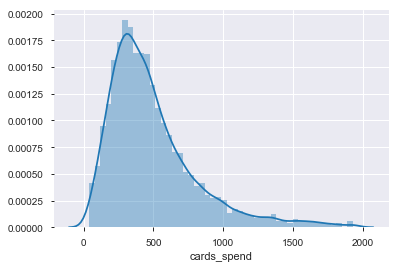

In [19]:
sns.distplot(credit.cards_spend)
plt.show()

In [20]:
credit['ln_cards_spend'] = np.log(credit['cards_spend']+1)

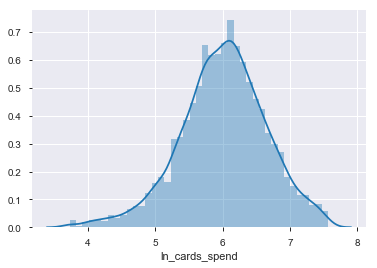

In [21]:
sns.distplot(credit.ln_cards_spend)
plt.show()

In [22]:
credit.shape

(5000, 160)

In [23]:
credit.rename(columns ={'townsize_2.0': 'townsize_2','townsize_3.0': 'townsize_3','townsize_4.0': 'townsize_4','townsize_5.0': 'townsize_5'},inplace=True)

In [24]:
credit.drop(['spousedcat_1','spousedcat_2','spousedcat_3','spousedcat_4',
'longmon','pets','longten','pets_freshfish','equipmon','lninc','lnlongten','cardtenurecat_5','card2tenurecat_5',
'tollmon','wiremon','edcat_4','edcat_5','tollmon','card2tenurecat_5','empcat_5','tollten','cardten','agecat_6','region_3','ownipod','callcard','cardtype_3',
'cardtype_4','commutecat_2','empcat_3','cardtype_3','reside','tollfree','cardtype_4','response_01','card2tenurecat_4','agecat_3',
                                                'agecat_5','empcat_4','homeown','internet_1','owncd','townsize_3'],axis=1,inplace=True)

In [25]:
feature_columns = credit.columns.difference(['ln_cards_spend', 'cards_spend','callid','empcat_2','ownfax','marital','multline','lnlongmon'
                                                 ,'cardbenefit_4','commutecat_4','commutetime','edcat_2','employ','callwait','internet_2'
                                                ,'agecat_4','cardbenefit_2','card2benefit_2','cardbenefit_3','commutecat_3','jobcat_3','jobsat_3',
                                                'pets_birds','pets_cats','owngame','townsize_2','townsize_4','townsize_5','wireten','cardmon',
                                                'commutecat_5','cardmon','cardtenurecat_2','cardtenurecat_3','cardtenurecat_4','card2tenurecat_2','card2tenurecat_3'
                                                ,'cardtype_2','carvalue','edcat_3','region_4','tenure','card2type_4','card2type_2','card2type_3','jobcat_2','jobsat_4'
                                                ,'bfast_2','bfast_3','hometype_2','confer','pets_dogs','wireless','reason_3','owntv','forward','card2fee','cardfee'
                                                ,'pets_small','ownpc','ownpda','hourstv','inccat_5','othdebt','creddebt','news','jobcat_6','voice','addresscat_3',
                                                 'addresscat_2','jobcat_4','region_2','jobcat_5','jobsat_5','jobsat_2','response_02'
                                                ,'hometype_3','hometype_4','pets_saltfish','ebill','reason_4','addresscat_4','addresscat_5','card2benefit_4',
                                            'card2benefit_3','cars','carbuy','lnothdebt','union','debtinc','default','equipten','equip','active','churn','pets_reptiles',
                                            'region_5','spousedcat_5','pager'])
feature_columns

Index(['card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3',
       'card_4', 'card_5', 'ed', 'gender', 'inccat_2', 'inccat_3', 'inccat_4',
       'income', 'internet_3', 'internet_4', 'lncreddebt', 'owndvd', 'ownvcr',
       'reason_2', 'reason_9', 'response_03', 'retire'],
      dtype='object')

In [26]:
feature_columns.shape

(23,)

In [27]:
train, test = train_test_split(credit, test_size = 0.3, random_state = 56789)

In [28]:
train_X, test_X, train_y, test_y = train_test_split(credit[feature_columns], 
                                            credit['ln_cards_spend'], test_size = 0.3, random_state = 12345)

In [29]:
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [30]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

,Variable,F_Value,P_Value
0,card2_2,25.005117,0.000
1,card2_3,29.324169,0.000
2,card2_4,13.364664,0.000
3,card2_5,14.909875,0.000
4,card_2,39.566264,0.000
5,card_3,54.019534,0.000
6,card_4,19.332684,0.000
7,card_5,14.816952,0.000
8,ed,50.454340,0.000
9,gender,22.719271,0.000


In [31]:
model_1 = 'ln_cards_spend ~ ' + ' + '.join(feature_columns)

In [32]:
lm1 = smf.ols(model_1,train).fit()

In [67]:
lmsummary = lm1.summary()

In [70]:
lmsummary.to_excel('linear_output.xlxs')

AttributeError: 'Summary' object has no attribute 'to_excel'

In [33]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_cards_spend   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     81.83
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          3.82e-305
Time:                        22:43:28   Log-Likelihood:                -2706.9
No. Observations:                3500   AIC:                             5462.
Df Residuals:                    3476   BIC:                             5610.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4333      0.073     87.535      

In [34]:
# separate the Y and X variables
y, X = dmatrices(model_1, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif = vif.round(1)

In [36]:
vif.sort_values(by = 'VIF Factor',ascending=False)

,Features,VIF Factor
0,Intercept,68.3
3,card2_4,2.3
7,card_4,2.2
2,card2_3,2.1
1,card2_2,2.1
5,card_2,2.0
6,card_3,2.0
11,inccat_2,1.8
14,income,1.8
20,reason_2,1.5


In [37]:
train['pred_spend'] = np.exp(lm1.predict(train))
train.head()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender,ed,union,employ,retire,income,debtinc,creddebt,lncreddebt,othdebt,...,card2tenurecat_2,card2tenurecat_3,bfast_2,bfast_3,internet_2,internet_3,internet_4,cards_spend,ln_cards_spend,pred_spend
4361,0,16,0,0,0,28.0,7.5,0.296100,-1.217058,1.803900,...,1,0,0,1,0,0,1,831.89,6.724902,616.094432
2519,1,12,0,2,0,24.0,7.8,0.904176,-0.100731,0.967824,...,0,0,0,1,0,0,0,534.07,6.282398,510.189052
4837,0,17,0,0,0,22.0,11.6,0.262856,-1.336149,2.289144,...,0,0,0,0,1,0,0,313.49,5.750952,258.329616
1334,0,15,1,21,0,111.0,15.3,1.069929,0.067592,15.913071,...,0,0,1,0,0,0,0,308.10,5.733665,424.323811
719,1,13,0,3,0,14.0,7.2,0.278208,-1.279386,0.729792,...,1,0,0,1,0,0,0,341.05,5.834957,342.418703


In [38]:
test['pred_spend'] = np.exp(lm1.predict(test))
test.head()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender,ed,union,employ,retire,income,debtinc,creddebt,lncreddebt,othdebt,...,card2tenurecat_2,card2tenurecat_3,bfast_2,bfast_3,internet_2,internet_3,internet_4,cards_spend,ln_cards_spend,pred_spend
4133,1,16,0,2,0,41.0,10.8,1.137996,0.129269,3.290004,...,0,0,0,0,1,0,0,539.0500,6.291662,491.586291
3771,1,13,0,18,0,113.0,11.1,6.685419,1.899929,5.857581,...,0,0,0,0,0,0,0,1537.3098,7.338440,840.570515
26,1,16,0,0,0,24.0,11.7,1.297296,0.260282,1.510704,...,1,0,0,1,0,0,1,548.6700,6.309318,411.528959
2049,0,15,0,4,0,29.0,7.2,0.288144,-1.244295,1.799856,...,0,1,0,0,0,0,0,308.1700,5.733891,302.946050
3385,0,15,0,8,0,220.0,11.3,14.280358,2.658910,10.292040,...,0,0,0,0,0,0,0,535.5500,6.285160,1178.427546


In [ ]:
pd.DataFrame

In [73]:
test.to_excel('linear_output.xlsx')

In [39]:
MAPE_train = np.mean(np.abs(train['cards_spend'] - train['pred_spend'])/train['cards_spend'])

MAPE_test = np.mean(np.abs(test['cards_spend'] - test['pred_spend'])/test['cards_spend'])

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.4762812568670429  |  MAPE of testing data:  0.48147240666747476


In [40]:
RMSE_train = mean_squared_error(train.cards_spend ,train.pred_spend).round(3)
RMSE_test = mean_squared_error(test.cards_spend ,test.pred_spend).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  72261.745  |  RMSE of testing data:  63061.201


In [41]:
Corr_train = stats.stats.pearsonr(train.cards_spend, train.pred_spend)
Corr_test = stats.stats.pearsonr(test.cards_spend, test.pred_spend)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)


Correlation of training data:  (0.5949573631292394, 0.0)  |  Correlation of testing data:  (0.5721293296997337, 3.791528311118431e-131)


In [42]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_spend'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_spend'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = train[['Deciles', 'cards_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['cards_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_spend']
Actual_avg = test[['Deciles', 'cards_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['cards_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')
Decile_analysis_test

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Deciles,pred_spend,cards_spend
0,9,887.911840,825.133513
1,8,640.453165,708.528693
2,7,533.863585,535.148800
3,6,459.121764,502.184045
4,5,410.097517,492.315663
5,4,369.883381,424.051797
6,3,330.940427,404.223723
7,2,300.442146,335.745197
8,1,268.391004,313.010923
9,0,226.296951,269.336777


In [43]:
Decile_analysis_train

,Deciles,pred_spend,cards_spend
0,9,852.826153,926.561746
1,8,634.893717,717.978321
2,7,534.725155,583.002360
3,6,462.541153,538.139109
4,5,412.066336,468.982990
5,4,369.943695,423.523649
6,3,335.209641,388.490656
7,2,305.958728,334.476507
8,1,274.664337,322.795336
9,0,227.330175,266.558170


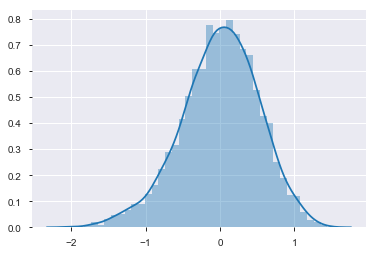

In [44]:
sns.distplot(lm1.resid)
plt.show()

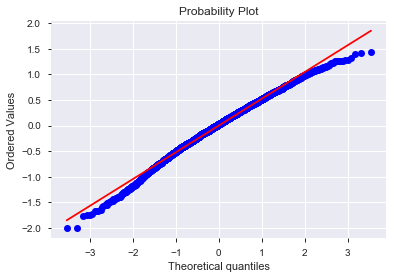

In [45]:
from scipy import stats
import pylab

stats.probplot(lm1.resid, dist = 'norm', plot = pylab)
pylab.show()


In [46]:
print(lm1.resid.mean())

-3.581389153493676e-15


In [47]:
print(stats.stats.pearsonr(lm1.resid, train.ln_cards_spend))

(0.8054486848543285, 0.0)


In [48]:
lm1.resid.shape

(3500,)

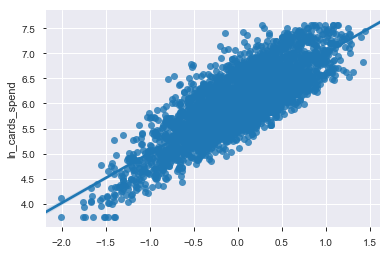

In [49]:
import seaborn as sns

sns.regplot(x=lm1.resid, y=train.ln_cards_spend)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()

In [50]:
feature_columns1 = credit.columns.difference([ 'cards_spend','callid','empcat_2','ownfax','marital','multline','lnlongmon'
                                                 ,'cardbenefit_4','commutecat_4','commutetime','edcat_2','employ','callwait','internet_2'
                                                ,'agecat_4','cardbenefit_2','card2benefit_2','cardbenefit_3','commutecat_3','jobcat_3','jobsat_3',
                                                'pets_birds','pets_cats','owngame','townsize_2','townsize_4','townsize_5','wireten','cardmon',
                                                'commutecat_5','cardmon','cardtenurecat_2','cardtenurecat_3','cardtenurecat_4','card2tenurecat_2','card2tenurecat_3'
                                                ,'cardtype_2','carvalue','edcat_3','region_4','tenure','card2type_4','card2type_2','card2type_3','jobcat_2','jobsat_4'
                                                ,'bfast_2','bfast_3','hometype_2','confer','pets_dogs','wireless','reason_3','owntv','forward','card2fee','cardfee'
                                                ,'pets_small','ownpc','ownpda','hourstv','inccat_5','othdebt','creddebt','news','jobcat_6','voice','addresscat_3',
                                                 'addresscat_2','jobcat_4','region_2','jobcat_5','jobsat_5','jobsat_2','response_02'
                                                ,'hometype_3','hometype_4','pets_saltfish','ebill','reason_4','addresscat_4','addresscat_5','card2benefit_4',
                                            'card2benefit_3','cars','carbuy','lnothdebt','union','debtinc','default','equipten','equip','active','churn','pets_reptiles',
                                            'region_5','spousedcat_5','pager'])

In [51]:
a = credit[feature_columns1]

In [52]:
a.head()

,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5,ed,gender,...,internet_3,internet_4,ln_cards_spend,lncreddebt,owndvd,ownvcr,reason_2,reason_9,response_03,retire
0,0,0,0,1,0,1,0,0,15,1,...,0,0,5.013697,0.183079,1,1,0,1,0,0
1,0,0,1,0,1,0,0,0,17,0,...,0,1,4.363608,0.200505,1,1,0,1,0,0
2,0,0,1,0,1,0,0,0,14,1,...,0,0,5.888795,-0.074056,1,1,1,0,0,0
3,0,1,0,0,1,0,0,0,16,0,...,0,0,5.887242,-3.401690,1,1,0,1,0,0
4,0,0,0,0,0,0,1,0,16,0,...,1,0,6.232114,-1.538705,1,1,0,1,0,0


In [53]:
import statsmodels.formula.api as smf


m = smf.ols(model_1,a).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()

In [54]:
sm_fr

,dfb_Intercept,dfb_card2_2,dfb_card2_3,dfb_card2_4,dfb_card2_5,dfb_card_2,dfb_card_3,dfb_card_4,dfb_card_5,dfb_ed,...,dfb_reason_2,dfb_reason_9,dfb_response_03,dfb_retire,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.022537,0.005518,-0.008904,-0.000864,-0.071926,0.014993,-0.021069,0.001750,-0.002810,-0.021924,...,-0.002069,-0.012036,0.008617,0.007139,4.619218e-04,-1.594226,0.004343,-0.105291,-1.594473,-0.105307
1,0.013822,-0.019164,0.004534,-0.052875,0.000583,-0.066684,-0.012787,-0.029724,-0.015285,-0.010197,...,-0.002128,-0.010867,0.019258,0.041688,1.302674e-03,-2.502971,0.004966,-0.176817,-2.504296,-0.176910
2,0.002193,-0.001538,0.000332,-0.004321,0.000039,-0.005128,-0.000955,-0.002967,-0.001301,-0.000289,...,-0.008435,-0.000108,0.000670,0.000854,7.579077e-06,-0.186243,0.005217,-0.013487,-0.186225,-0.013486
3,-0.007329,0.001327,0.006821,-0.001106,-0.001683,0.007814,0.002379,-0.001086,-0.001121,0.008123,...,0.000336,0.002838,-0.002069,-0.009314,4.079461e-05,0.494332,0.003991,0.031290,0.494294,0.031288
4,0.004139,-0.010705,-0.010570,-0.008029,-0.006143,-0.001763,-0.001187,0.004759,-0.000363,-0.001184,...,0.000054,0.002321,-0.002469,-0.007018,3.368462e-05,0.424014,0.004476,0.028433,0.423979,0.028431
5,0.021267,-0.006491,-0.022727,0.004009,0.001180,-0.027803,-0.011411,0.005343,-0.003914,-0.023305,...,0.000464,-0.006443,0.007181,0.001839,2.897288e-04,-1.400635,0.003532,-0.083388,-1.400770,-0.083396
6,-0.020133,0.019467,-0.009596,-0.001386,0.002555,0.008721,-0.003065,-0.003040,0.087290,0.012170,...,0.002665,0.010290,-0.005669,-0.003783,6.353471e-04,1.459241,0.007110,0.123484,1.459407,0.123498
7,0.001465,-0.001965,0.007072,-0.004669,0.000127,-0.011391,-0.007110,-0.011674,-0.006126,0.003488,...,0.019602,-0.000605,-0.002881,-0.001294,6.063672e-05,0.482535,0.006211,0.038148,0.482498,0.038145
8,-0.013070,0.017068,0.001042,-0.003253,-0.008225,-0.000469,0.018132,-0.003160,-0.007986,-0.005228,...,0.000639,0.008500,-0.003214,0.034695,2.559213e-04,1.351950,0.003349,0.078372,1.352063,0.078378
9,0.000012,-0.012701,0.004963,-0.000116,-0.001464,-0.006359,0.001353,0.000137,-0.055120,0.005824,...,-0.000936,-0.005509,0.003136,0.001786,2.491839e-04,-0.919622,0.007022,-0.077333,-0.919607,-0.077332


In [55]:
cr = credit[feature_columns1]

In [56]:
cr['cooks'] = sm_fr['cooks_d']

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
tt = cr[cr['cooks'] < 4/cr.shape[0] ]

In [58]:
train, test = train_test_split(tt, test_size = 0.3, random_state = 56789)

In [59]:
feature_columns = feature_columns.difference(['internet_3','internet_4','ownvcr'])

In [60]:
model_2 = 'ln_cards_spend ~ ' + ' + '.join(feature_columns)

In [61]:
lm2 = smf.ols(model_2,train).fit()

In [62]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_cards_spend   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:44:47   Log-Likelihood:                -2049.6
No. Observations:                3321   AIC:                             4141.
Df Residuals:                    3300   BIC:                             4269.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4737      0.063    103.506      

In [63]:
train['pred_spend'] = np.exp(lm2.predict(train))
train.head()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5,ed,gender,...,ln_cards_spend,lncreddebt,owndvd,ownvcr,reason_2,reason_9,response_03,retire,cooks,pred_spend
1593,0,0,1,0,0,1,0,0,13,1,...,5.338451,-1.025358,1,1,0,1,1,0,0.000101,327.815582
2617,0,1,0,0,0,0,1,0,21,1,...,6.334309,0.646753,1,1,0,1,0,0,0.000107,386.916549
2384,1,0,0,0,0,1,0,0,13,1,...,6.527782,1.470656,1,1,0,0,0,0,0.000239,385.664104
427,0,0,1,0,0,1,0,0,20,0,...,5.352379,-3.020250,0,0,0,1,0,1,0.000016,212.610468
1492,1,0,0,0,0,1,0,0,14,1,...,6.110558,0.304495,1,1,0,1,0,0,0.000041,325.367772


In [64]:
test['pred_spend'] = np.exp(lm2.predict(test))
test.head()

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5,ed,gender,...,ln_cards_spend,lncreddebt,owndvd,ownvcr,reason_2,reason_9,response_03,retire,cooks,pred_spend
995,0,0,0,0,0,1,0,0,14,1,...,6.412048,0.646684,1,1,0,1,1,0,6.099064e-07,660.568193
2013,0,1,0,0,0,0,0,0,19,1,...,6.386862,1.613021,1,1,1,0,0,0,4.951368e-04,1102.547276
851,0,0,1,0,0,0,0,0,20,1,...,6.737963,2.487334,1,1,0,1,1,0,1.289391e-05,934.670028
2212,1,0,0,0,0,1,0,0,18,0,...,6.242243,0.332357,1,1,0,1,0,0,2.269704e-05,417.202226
471,0,0,1,0,0,1,0,0,19,1,...,6.113483,0.703197,1,1,0,1,0,0,2.300858e-05,370.678110


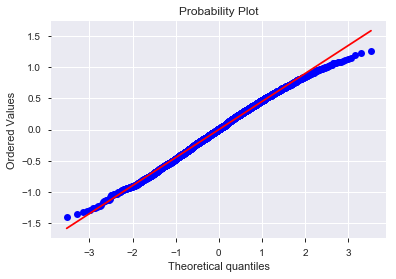

In [65]:
stats.probplot(lm2.resid, dist = 'norm', plot = pylab)
pylab.show()